In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# Read datasets
data = pd.read_csv('./InflationIndicator_pro.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10023 non-null  int64  
 1   month             10023 non-null  int64  
 2   day               10023 non-null  int64  
 3   USD_EUR_value     10023 non-null  int64  
 4   USD_EGP           10023 non-null  float64
 5   EUR_EGP           10022 non-null  float64
 6   cpi_rate          10023 non-null  float64
 7   cpi_base_2010     10023 non-null  float64
 8   RealInterestRate  10023 non-null  float64
 9   InterestRate      10023 non-null  float64
 10  XAU_Price         10023 non-null  float64
 11  gdp_rate          10023 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 939.8 KB


[19.013425353773847, 168403.1802084855, 0.9985302207915141]


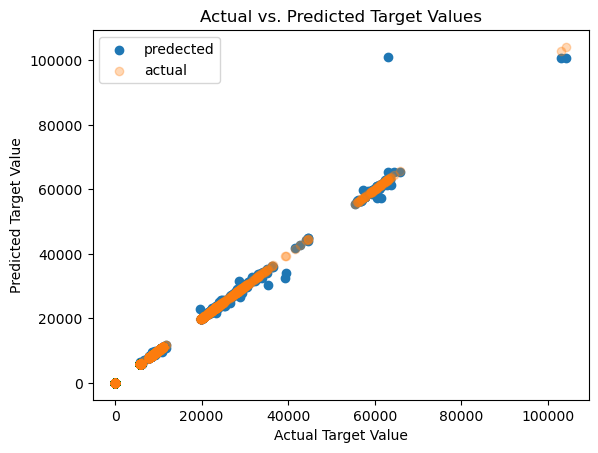

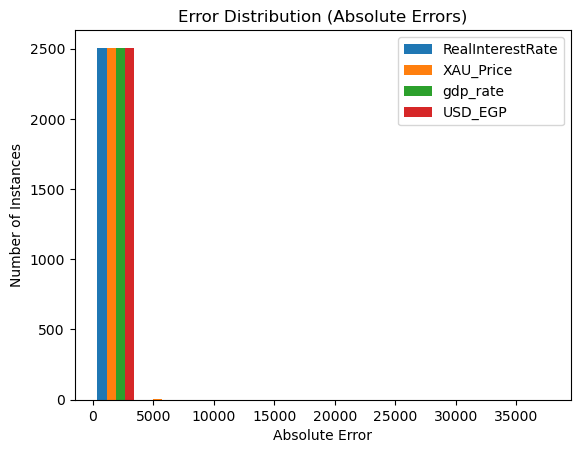

In [145]:
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor


target_features = ["RealInterestRate","XAU_Price","gdp_rate","USD_EGP"]
target = data[target_features]
X = ["year","month","day"]
x = data[X]
train_X, val_X, train_y, val_y = train_test_split(x, target, random_state = 0)
# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)
# Fit model
melbourne_model.fit(train_X, train_y)
# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
a = [
    mean_absolute_error(val_y, val_predictions),
    mean_squared_error(val_y, val_predictions),
    r2_score(val_y, val_predictions)
]
print(a)

plt.scatter(val_y, val_predictions,label="predected")
plt.scatter(val_y, val_y,alpha=0.3, label="actual")
plt.xlabel("Actual Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Actual vs. Predicted Target Values")
plt.legend()
plt.show()


# Plot the error distribution (absolute errors)


errors = np.abs(val_y - val_predictions)
plt.hist(errors,label=target_features)
plt.xlabel("Absolute Error")
plt.ylabel("Number of Instances")
plt.title("Error Distribution (Absolute Errors)")
plt.legend()
plt.show()

In [146]:
print(melbourne_model.predict(x.tail()))

[[-5.81666667e+00  1.02533850e+05  4.20000000e+00  4.69000000e+01]
 [-5.81666667e+00  1.01756420e+05  4.20000000e+00  4.67500000e+01]
 [-5.81666667e+00  1.00904450e+05  4.20000000e+00  4.67872000e+01]
 [-5.81666667e+00  1.00904450e+05  4.20000000e+00  4.67872000e+01]
 [-5.81666667e+00  1.00904450e+05  4.20000000e+00  4.67872000e+01]]


[21.42414814665874, 163387.5826601877, 0.998489252622358]


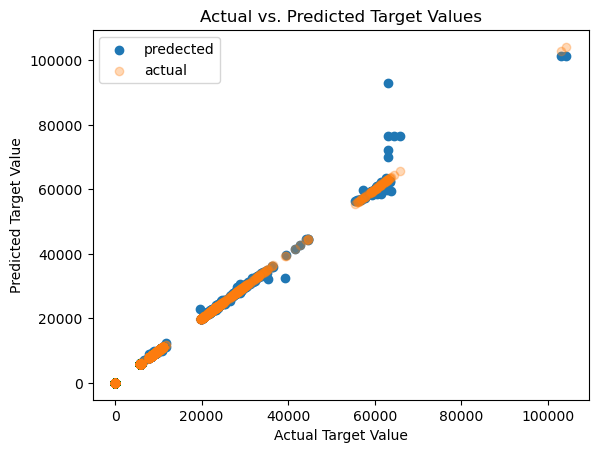

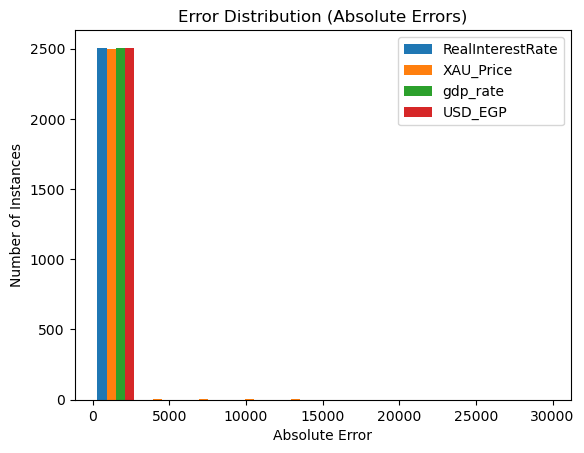

In [147]:
from sklearn.ensemble import RandomForestRegressor
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
# Define model
melbourne_model = RandomForestRegressor(random_state=1)
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)

b = [mean_absolute_error(val_y, val_predictions),mean_squared_error(val_y,val_predictions),r2_score(val_y,val_predictions)]
print(b)

plt.scatter(val_y, val_predictions,label="predected")
plt.scatter(val_y, val_y,alpha=0.3, label="actual")
plt.xlabel("Actual Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Actual vs. Predicted Target Values")
plt.legend()
plt.show()

errors = np.abs(val_y - val_predictions)
plt.hist(errors,label=target_features)
plt.xlabel("Absolute Error")
plt.ylabel("Number of Instances")
plt.title("Error Distribution (Absolute Errors)")
plt.legend()
plt.show()

[16.525715165727387, 124978.30462762933, 0.9987537563177574]


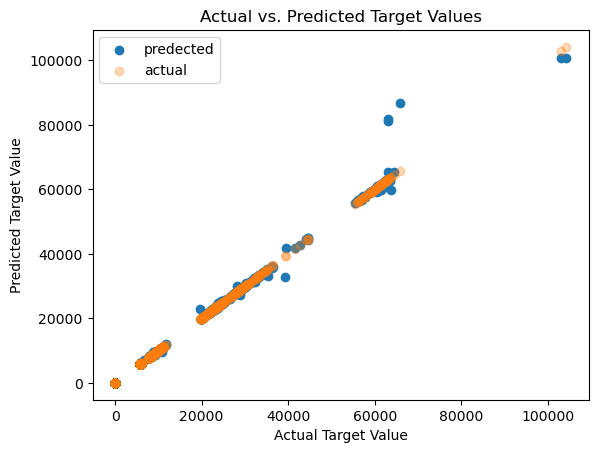

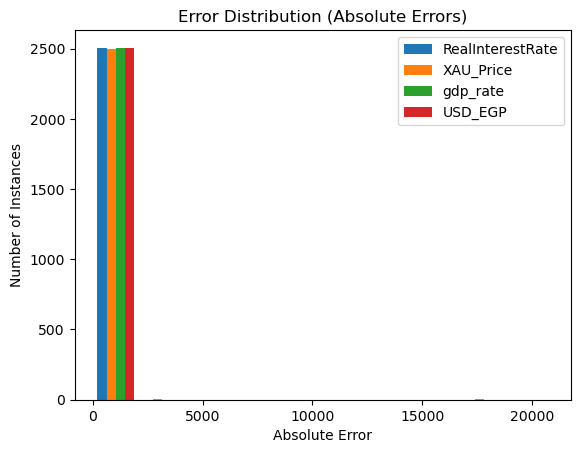

In [148]:
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor(random_state=1)

clf.fit(train_X, train_y)

val_predictions = clf.predict(val_X)

c = [mean_absolute_error(val_y, val_predictions),mean_squared_error(val_y,val_predictions),r2_score(val_y,val_predictions)]
print(c)



plt.scatter(val_y, val_predictions,label="predected")
plt.scatter(val_y, val_y,alpha=0.3, label="actual")
plt.xlabel("Actual Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Actual vs. Predicted Target Values")
plt.legend()
plt.show()

errors = np.abs(val_y - val_predictions)
plt.hist(errors,label=target_features)
plt.xlabel("Absolute Error")
plt.ylabel("Number of Instances")
plt.title("Error Distribution (Absolute Errors)")
plt.legend()
plt.show()